# PHASE 4

# Unsupervised ML (Clustering)

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# DISTWISE TOTAL CRIME DATAS FROM 2001 TO 2012

In [2]:
#Loadind the total crimes data from 2001_to_2012
df=pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [3]:
df.shape

(9017, 33)

In [4]:
df.columns.to_list()

['STATE/UT',
 'DISTRICT',
 'YEAR',
 'MURDER',
 'ATTEMPT TO MURDER',
 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
 'RAPE',
 'CUSTODIAL RAPE',
 'OTHER RAPE',
 'KIDNAPPING & ABDUCTION',
 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
 'KIDNAPPING AND ABDUCTION OF OTHERS',
 'DACOITY',
 'PREPARATION AND ASSEMBLY FOR DACOITY',
 'ROBBERY',
 'BURGLARY',
 'THEFT',
 'AUTO THEFT',
 'OTHER THEFT',
 'RIOTS',
 'CRIMINAL BREACH OF TRUST',
 'CHEATING',
 'COUNTERFIETING',
 'ARSON',
 'HURT/GREVIOUS HURT',
 'DOWRY DEATHS',
 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
 'INSULT TO MODESTY OF WOMEN',
 'CRUELTY BY HUSBAND OR HIS RELATIVES',
 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
 'CAUSING DEATH BY NEGLIGENCE',
 'OTHER IPC CRIMES',
 'TOTAL IPC CRIMES']

In [5]:
#Checking for null values
df.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

In [6]:
#Checking for duplicates
df.duplicated().sum()

0

In [7]:
df['DISTRICT'].value_counts()

TOTAL              408
G.R.P.              46
SOUTH               37
NORTH               37
WEST                36
                  ... 
RAILWAYS KMR         1
MIDNAPUR             1
KAWARDHA             1
A and N ISLANDS      1
CAR                  1
Name: DISTRICT, Length: 808, dtype: int64

In [8]:
df['DISTRICT'].unique()

array(['ADILABAD', 'ANANTAPUR', 'CHITTOOR', 'CUDDAPAH', 'EAST GODAVARI',
       'GUNTAKAL RLY.', 'GUNTUR', 'HYDERABAD CITY', 'KARIMNAGAR',
       'KHAMMAM', 'KRISHNA', 'KURNOOL', 'MAHABOOBNAGAR', 'MEDAK',
       'NALGONDA', 'NELLORE', 'NIZAMABAD', 'PRAKASHAM', 'RANGA REDDY',
       'SECUNDERABAD RLY.', 'SRIKAKULAM', 'VIJAYAWADA', 'VIJAYAWADA RLY.',
       'VISAKHA RURAL', 'VISAKHAPATNAM', 'VIZIANAGARAM', 'WARANGAL',
       'WEST GODAVARI', 'TOTAL', 'CHANGLANG', 'DIBANG VALLEY',
       'KAMENG EAST', 'KAMENG WEST', 'LOHIT', 'PAPUM PARE', 'SIANG EAST',
       'SIANG UPPER', 'SIANG WEST', 'SUBANSIRI LOWER', 'SUBANSIRI UPPER',
       'TAWANG', 'TIRAP', 'BARPETA', 'BONGAIGAON', 'C.I.D.', 'CACHAR',
       'DARRANG', 'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'G.R.P.', 'GOALPARA',
       'GOLAGHAT', 'GUWAHATI CITY', 'HAILAKANDI', 'JORHAT', 'KAMRUP',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MORIGAON',
       'N.C.HILLS', 'NAGAON', 'NALBARI', 'R.P.O.', 'SIBSAGAR', 'SONITPUR',
    

In [9]:
#Dropping irrevalent datas
df = df.drop(list(df[df['DISTRICT'] == 'TOTAL'].index))
df = df.drop(list(df[df['DISTRICT'] == 'DELHI UT TOTAL'].index))

In [10]:
df.shape

(8597, 33)

# DISTWISE CRIME DATAS AGAINST WOMEN 

In [11]:
#LoadinG the total crimes against Women from 2001_to_2012 dataset
df_1=pd.read_csv("42_District_wise_crimes_committed_against_women_2001_2012.csv")
df_1

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


In [12]:
df_1.shape

(9017, 10)

In [13]:
df_1.columns.to_list()

['STATE/UT',
 'DISTRICT',
 'Year',
 'Rape',
 'Kidnapping and Abduction',
 'Dowry Deaths',
 'Assault on women with intent to outrage her modesty',
 'Insult to modesty of Women',
 'Cruelty by Husband or his Relatives',
 'Importation of Girls']

In [14]:
#Checking for null values
df_1.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

In [15]:
#Checking for duplicates
df_1.duplicated().sum()

0

In [16]:
df_1['DISTRICT'].value_counts()

TOTAL              408
G.R.P.              46
SOUTH               37
NORTH               37
WEST                36
                  ... 
RAILWAYS KMR         1
MIDNAPUR             1
KAWARDHA             1
A and N ISLANDS      1
CAR                  1
Name: DISTRICT, Length: 808, dtype: int64

In [17]:
#Dropping irrevalent datas
df_1 = df_1.drop(list(df_1[df_1['DISTRICT'] == 'TOTAL'].index))
df_1 = df_1.drop(list(df_1[df_1['DISTRICT'] == 'DELHI UT TOTAL'].index))

In [18]:
df_1.shape

(8597, 10)

In [19]:
df_1.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

In [20]:
df_1['Total Crimes Against Women']= df_1[['Rape', 'Kidnapping and Abduction','Dowry Deaths', 'Assault on women with intent to outrage her modesty',
                                          'Insult to modesty of Women', 'Cruelty by Husband or his Relatives','Importation of Girls']].sum(axis=1)

In [21]:
df_1.drop(['Rape', 'Kidnapping and Abduction','Dowry Deaths', 'Assault on women with intent to outrage her modesty',
                                          'Insult to modesty of Women', 'Cruelty by Husband or his Relatives','Importation of Girls'], axis=1, inplace=True)

In [22]:
df_1.columns=['STATE/UT','DISTRICT','YEAR', 'Total Crimes Against Women']

In [23]:
df_1

,STATE/UT,DISTRICT,YEAR,Total Crimes Against Women
0,ANDHRA PRADESH,ADILABAD,2001,454
1,ANDHRA PRADESH,ANANTAPUR,2001,356
2,ANDHRA PRADESH,CHITTOOR,2001,456
3,ANDHRA PRADESH,CUDDAPAH,2001,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,475
...,...,...,...,...
9010,DELHI,STF,2012,0
9011,DELHI,WEST,2012,739
9012,LAKSHADWEEP,LAKSHADWEEP,2012,2
9014,PUDUCHERRY,KARAIKAL,2012,11


# DISTWISE CRIME DATAS AGAINST CHILDREN

In [24]:
#LoadinG the total crimes against cHILDREN from 2001_to_2012 dataset
df_2=pd.read_csv("03_District_wise_crimes_committed_against_children_2001_2012.csv")
df_2

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Total
0,ANDHRA PRADESH,ADILABAD,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ANDHRA PRADESH,ANANTAPUR,2001,19.0,12.0,29.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,66
2,ANDHRA PRADESH,CHITTOOR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9011,LAKSHADWEEP,TOTAL,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9012,PUDUCHERRY,KARAIKAL,2012,0.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7
9013,PUDUCHERRY,PUDUCHERRY,2012,0.0,4.0,16.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,25


In [25]:
df_2.shape

(9015, 15)

In [26]:
df_2.columns.to_list()

['STATE/UT',
 'DISTRICT',
 'Year',
 'Murder',
 'Rape',
 'Kidnapping and Abduction',
 'Foeticide',
 'Abetment of suicide',
 'Exposure and abandonment',
 'Procuration of minor girls',
 'Buying of girls for prostitution',
 'Selling of girls for prostitution',
 'Prohibition of child marriage act',
 'Other Crimes',
 'Total']

In [27]:
df_2.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping and Abduction', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       'Prohibition of child marriage act', 'Other Crimes', 'Total'],
      dtype='object')

In [28]:
#Dropping irrevalent datas
df_2 = df_2.drop(list(df_2[df_2['DISTRICT'] == 'TOTAL'].index))
df_2 = df_2.drop(list(df_2[df_2['DISTRICT'] == 'DELHI UT TOTAL'].index))

In [29]:
df_2.shape

(8598, 15)

In [30]:
#Dropping unwanted columns
df_2.drop(['Murder', 'Rape',
       'Kidnapping and Abduction', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       'Prohibition of child marriage act', 'Other Crimes'], axis=1, inplace=True)

In [31]:
df_2.shape

(8598, 4)

In [32]:
df_2.columns=['STATE/UT','DISTRICT','YEAR', 'Total Crimes Against Children']

In [33]:
df_2.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'Total Crimes Against Children'], dtype='object')

In [34]:
#Checking for null values
df_2.isnull().sum()

STATE/UT                         0
DISTRICT                         0
YEAR                             0
Total Crimes Against Children    0
dtype: int64

In [35]:
df_2

,STATE/UT,DISTRICT,YEAR,Total Crimes Against Children
0,ANDHRA PRADESH,ADILABAD,2001,0
1,ANDHRA PRADESH,ANANTAPUR,2001,66
2,ANDHRA PRADESH,CHITTOOR,2001,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0
...,...,...,...,...
9007,DELHI,STF,2012,0
9008,DELHI,WEST,2012,542
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0
9012,PUDUCHERRY,KARAIKAL,2012,7


In [36]:
# Merge data frames on multiple columns
df_merge_1 = pd.merge(df, df_1, on=['STATE/UT', 'DISTRICT', 'YEAR'], how='left')

In [37]:
df_merge_1.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes Against Women
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,1131,16,149,34,175,0,181,1518,4154,454.0
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,1543,7,118,24,154,0,270,754,4125,356.0
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,2088,14,112,83,186,0,404,1262,5818,456.0
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,795,17,126,38,57,0,233,1181,3140,278.0
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,1244,12,109,58,247,0,431,2313,6507,475.0


In [38]:
df_merge_1.shape

(8599, 34)

In [39]:
df_merge_1.tail()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes Against Women
8594,DELHI UT,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,6,NaN
8595,DELHI UT,WEST,2012,52,37,10,79,0,79,454,...,227,18,53,6,327,0,292,1144,5558,NaN
8596,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,0,1,0,1,0,0,32,60,2.0
8597,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,186,0,2,0,1,0,44,392,787,11.0
8598,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,632,0,7,2,5,0,219,1668,3494,35.0


In [40]:
df_merge_2 = pd.merge(df_merge_1, df_2, on=['STATE/UT', 'DISTRICT', 'YEAR'], how='left')

In [41]:
df_merge_2

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes Against Women,Total Crimes Against Children
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,16,149,34,175,0,181,1518,4154,454.0,0.0
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,7,118,24,154,0,270,754,4125,356.0,66.0
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,14,112,83,186,0,404,1262,5818,456.0,0.0
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,17,126,38,57,0,233,1181,3140,278.0,0.0
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,12,109,58,247,0,431,2313,6507,475.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8594,DELHI UT,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,6,NaN,NaN
8595,DELHI UT,WEST,2012,52,37,10,79,0,79,454,...,18,53,6,327,0,292,1144,5558,NaN,NaN
8596,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,0,1,0,1,0,0,32,60,2.0,0.0
8597,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,0,2,0,1,0,44,392,787,11.0,7.0


In [42]:
df_merge_2[df_merge_2.isnull().any(axis=1)]

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes Against Women,Total Crimes Against Children
61,ASSAM,N.C.HILLS,2001,17,8,1,2,0,2,8,...,0,2,0,7,0,16,30,187,15.0,NaN
169,HARYANA,HISSAR,2001,45,53,7,10,0,10,26,...,24,33,0,117,0,4,1177,2830,202.0,NaN
175,HARYANA,MAHENDRAGARH,2001,26,10,0,11,0,11,13,...,8,19,0,23,0,2,611,1169,69.0,NaN
229,JHARKHAND,GUMLA,2001,136,18,7,29,0,29,16,...,0,2,0,10,1,0,227,658,53.0,NaN
667,DELHI UT,CENTRAL,2001,29,42,4,28,0,28,62,...,4,30,7,2,0,13,1422,3750,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8591,DELHI UT,SOUTH,2012,39,19,3,70,0,70,245,...,17,59,36,68,0,25,1651,5045,NaN,NaN
8592,DELHI UT,SOUTH-EAST,2012,46,69,6,116,0,116,538,...,11,160,43,123,0,218,2004,7040,NaN,NaN
8593,DELHI UT,SOUTH-WEST,2012,47,48,6,87,0,87,399,...,18,69,21,207,0,4,1387,4085,NaN,NaN
8594,DELHI UT,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,6,NaN,NaN


In [43]:
df_merge_2.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'Total Crimes Against Women', 'Total Crimes Against Children'],
      dtype='object')

In [44]:
df=df_merge_2

In [45]:
df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes Against Women,Total Crimes Against Children
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,16,149,34,175,0,181,1518,4154,454.0,0.0
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,7,118,24,154,0,270,754,4125,356.0,66.0
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,14,112,83,186,0,404,1262,5818,456.0,0.0
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,17,126,38,57,0,233,1181,3140,278.0,0.0
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,12,109,58,247,0,431,2313,6507,475.0,0.0


In [46]:
df["Total Crimes Against Women"] = df["Total Crimes Against Women"].fillna(df["Total Crimes Against Women"].median())
df["Total Crimes Against Children"] = df["Total Crimes Against Children"].fillna(df["Total Crimes Against Children"].median())

In [47]:
#Checking for null values
df.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

In [48]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'Total Crimes Against Women', 'Total Crimes Against Children'],
      dtype='object')

In [49]:
#Dropping irrelevant columns bcoz these datas covered in 'Total crimes against Women'
df.drop(['RAPE', 'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUCTION', 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY','INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'], axis=1, inplace =True)

In [50]:
df.shape

(8599, 25)

Merging columns

In [51]:
df['Murder cases'] = df[['MURDER','ATTEMPT TO MURDER','CULPABLE HOMICIDE NOT AMOUNTING TO MURDER']].sum(axis=1)

In [52]:
df.drop(['MURDER', 'ATTEMPT TO MURDER','CULPABLE HOMICIDE NOT AMOUNTING TO MURDER'] ,axis =1 , inplace = True)

In [53]:
df['Robbery & Theft'] = df[['DACOITY','PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
                       'AUTO THEFT', 'OTHER THEFT']].sum(axis=1)

In [54]:
df.drop(['DACOITY','PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT'], axis=1 , inplace=True)

In [55]:
df['Cheating cases'] = df[['CRIMINAL BREACH OF TRUST','CHEATING', 'COUNTERFIETING']].sum(axis = 1)

In [56]:
df.drop(['CRIMINAL BREACH OF TRUST','CHEATING', 'COUNTERFIETING'] , axis =1 , inplace = True)

In [57]:
df.shape

(8599, 15)

In [58]:
df.head()

,STATE/UT,DISTRICT,YEAR,KIDNAPPING AND ABDUCTION OF OTHERS,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes Against Women,Total Crimes Against Children,Murder cases,Robbery & Theft,Cheating cases
0,ANDHRA PRADESH,ADILABAD,2001,16,78,30,1131,181,1518,4154,454.0,0.0,178,646,121
1,ANDHRA PRADESH,ANANTAPUR,2001,23,168,69,1543,270,754,4125,356.0,66.0,277,947,84
2,ANDHRA PRADESH,CHITTOOR,2001,25,156,38,2088,404,1262,5818,456.0,0.0,160,1701,251
3,ANDHRA PRADESH,CUDDAPAH,2001,5,164,23,795,233,1181,3140,278.0,0.0,134,449,51
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,70,41,1244,431,2313,6507,475.0,0.0,150,2508,273


In [59]:
df['Total Crimes Against Women']=df['Total Crimes Against Women'].astype(int)

In [60]:
df['Total Crimes Against Children']=df['Total Crimes Against Children'].astype(int)

In [61]:
df.head()

,STATE/UT,DISTRICT,YEAR,KIDNAPPING AND ABDUCTION OF OTHERS,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes Against Women,Total Crimes Against Children,Murder cases,Robbery & Theft,Cheating cases
0,ANDHRA PRADESH,ADILABAD,2001,16,78,30,1131,181,1518,4154,454,0,178,646,121
1,ANDHRA PRADESH,ANANTAPUR,2001,23,168,69,1543,270,754,4125,356,66,277,947,84
2,ANDHRA PRADESH,CHITTOOR,2001,25,156,38,2088,404,1262,5818,456,0,160,1701,251
3,ANDHRA PRADESH,CUDDAPAH,2001,5,164,23,795,233,1181,3140,278,0,134,449,51
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,70,41,1244,431,2313,6507,475,0,150,2508,273


We have combined necessary datsets and right columns for Clustering. Now, we will go for Clustering.

# Unsupervised ML (Clustering of Districts)

# 4.1 Create 3 clusters:-

In [62]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

import warnings
warnings.filterwarnings('ignore')

In [63]:
df

,STATE/UT,DISTRICT,YEAR,KIDNAPPING AND ABDUCTION OF OTHERS,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes Against Women,Total Crimes Against Children,Murder cases,Robbery & Theft,Cheating cases
0,ANDHRA PRADESH,ADILABAD,2001,16,78,30,1131,181,1518,4154,454,0,178,646,121
1,ANDHRA PRADESH,ANANTAPUR,2001,23,168,69,1543,270,754,4125,356,66,277,947,84
2,ANDHRA PRADESH,CHITTOOR,2001,25,156,38,2088,404,1262,5818,456,0,160,1701,251
3,ANDHRA PRADESH,CUDDAPAH,2001,5,164,23,795,233,1181,3140,278,0,134,449,51
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,70,41,1244,431,2313,6507,475,0,150,2508,273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8594,DELHI UT,STF,2012,0,0,0,0,0,1,6,160,9,1,0,4
8595,DELHI UT,WEST,2012,198,5,18,227,292,1144,5558,160,9,99,4948,240
8596,LAKSHADWEEP,LAKSHADWEEP,2012,0,10,3,3,0,32,60,2,0,0,17,0
8597,PUDUCHERRY,KARAIKAL,2012,0,17,1,186,44,392,787,11,7,13,187,17


In [64]:
X = df.drop(['STATE/UT','DISTRICT','YEAR'], axis=1)

In [65]:
#Scalling our data
scalar = StandardScaler()
X_scaled=scalar.fit_transform(X)

In [66]:
#Clustering using Kmeans, no.of cluster= 3
model = KMeans(n_clusters=3, random_state=42)

y = model.fit_predict(X)

In [67]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [68]:
model.labels_

array([0, 0, 0, ..., 1, 1, 0])

In [69]:
df['cluster'] = model.labels_

In [70]:
df['cluster'].value_counts()

1    6148
0    2321
2     130
Name: cluster, dtype: int64

In [71]:
df.sample(30)

,STATE/UT,DISTRICT,YEAR,KIDNAPPING AND ABDUCTION OF OTHERS,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes Against Women,Total Crimes Against Children,Murder cases,Robbery & Theft,Cheating cases,cluster
7362,KARNATAKA,KOLAR,2011,5,190,0,279,2,1070,2053,77,7,82,527,33,1
225,JHARKHAND,DUMKA,2001,24,75,16,263,18,291,1016,73,0,99,201,22,1
2220,GUJARAT,SURENDRANAGAR,2004,4,46,11,446,148,1472,2850,134,37,50,696,109,1
4794,UTTAR PRADESH,SAHARANPUR,2007,7,80,0,32,132,1338,2960,371,33,210,884,295,1
7163,BIHAR,JEHANABAD,2011,17,135,4,79,58,913,1658,74,4,68,442,49,1
5959,MAHARASHTRA,AMRAVATI COMMR.,2009,3,89,12,328,78,823,2629,191,46,42,1673,87,1
1181,RAJASTHAN,KOTA,2002,28,159,27,480,178,2742,6528,651,21,434,2563,324,0
5834,JHARKHAND,GARHWA,2009,6,199,10,267,50,367,1321,116,0,80,248,66,1
2400,MADHYA PRADESH,SHIVPURI,2004,15,53,22,390,101,2328,3824,230,10,127,847,15,0
3522,ASSAM,TINSUKIA,2006,19,13,17,144,216,362,2660,131,0,61,2798,43,1


In [72]:
df[df['cluster'] == 1]

,STATE/UT,DISTRICT,YEAR,KIDNAPPING AND ABDUCTION OF OTHERS,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes Against Women,Total Crimes Against Children,Murder cases,Robbery & Theft,Cheating cases,cluster
3,ANDHRA PRADESH,CUDDAPAH,2001,5,164,23,795,233,1181,3140,278,0,134,449,51,1
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,0,1,0,1,4,104,287,1,0,4,331,3,1
13,ANDHRA PRADESH,MEDAK,2001,6,100,37,1367,335,454,3532,398,34,169,844,108,1
16,ANDHRA PRADESH,NIZAMABAD,2001,17,51,30,1383,220,787,3621,359,54,169,655,184,1
17,ANDHRA PRADESH,PRAKASHAM,2001,19,138,43,1266,263,808,3678,395,3,187,732,105,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8586,DELHI UT,NEW DELHI,2012,15,12,1,16,67,302,1057,160,9,16,782,162,1
8587,DELHI UT,NORTH,2012,69,5,3,92,13,927,2700,160,9,44,2192,167,1
8594,DELHI UT,STF,2012,0,0,0,0,0,1,6,160,9,1,0,4,1
8596,LAKSHADWEEP,LAKSHADWEEP,2012,0,10,3,3,0,32,60,2,0,0,17,0,1


In [73]:
df[df['cluster'] == 0]

,STATE/UT,DISTRICT,YEAR,KIDNAPPING AND ABDUCTION OF OTHERS,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes Against Women,Total Crimes Against Children,Murder cases,Robbery & Theft,Cheating cases,cluster
0,ANDHRA PRADESH,ADILABAD,2001,16,78,30,1131,181,1518,4154,454,0,178,646,121,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,168,69,1543,270,754,4125,356,66,277,947,84,0
2,ANDHRA PRADESH,CHITTOOR,2001,25,156,38,2088,404,1262,5818,456,0,160,1701,251,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,70,41,1244,431,2313,6507,475,0,150,2508,273,0
6,ANDHRA PRADESH,GUNTUR,2001,31,244,43,1792,369,2426,7848,758,0,272,2660,375,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8591,DELHI UT,SOUTH,2012,111,3,4,101,25,1651,5045,160,9,61,4541,290,0
8592,DELHI UT,SOUTH-EAST,2012,232,12,11,252,218,2004,7040,160,9,121,6061,262,0
8593,DELHI UT,SOUTH-WEST,2012,155,6,6,131,4,1387,4085,160,9,101,2601,219,0
8595,DELHI UT,WEST,2012,198,5,18,227,292,1144,5558,160,9,99,4948,240,0


In [74]:
df[df['cluster'] == 2]

,STATE/UT,DISTRICT,YEAR,KIDNAPPING AND ABDUCTION OF OTHERS,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes Against Women,Total Crimes Against Children,Murder cases,Robbery & Theft,Cheating cases,cluster
133,GUJARAT,AHMEDABAD COMMR.,2001,26,191,2,1311,0,6129,13496,774,77,208,8085,358,2
244,KARNATAKA,BANGALORE COMMR.,2001,96,298,3,3735,38,11106,27254,639,6,553,15034,2045,2
276,KERALA,ERNAKULAM,2001,13,626,25,1756,0,9669,14843,374,13,118,3225,301,2
294,MADHYA PRADESH,BHOPAL,2001,7,77,8,652,272,9372,13708,609,102,170,3667,225,2
307,MADHYA PRADESH,INDORE,2001,15,129,29,1306,269,6567,13063,583,115,245,6417,211,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,MAHARASHTRA,MUMBAI COMMR.,2012,71,374,86,3939,621,6423,30508,1621,517,394,25391,2439,2
8245,MAHARASHTRA,PUNE COMMR.,2012,32,532,48,1071,523,2392,12308,591,288,237,10197,866,2
8407,TAMIL NADU,CHENNAI,2012,22,95,10,1412,1411,12131,19881,639,108,403,4971,956,2
8544,WEST BENGAL,24 PARGANAS SOUTH,2012,0,1976,15,234,70,7641,14370,2457,19,260,2736,260,2


# 4.2  Create DataFrame for each cluster that shows data according to the areas.

In [75]:
peaceful_areas = df[df['cluster'] == 1]
moderate_areas = df[df['cluster'] == 0]
sensitive_areas = df[df['cluster'] == 2]

# 1.SENSITIVE AREA'S

In [76]:
sensitive_areas

,STATE/UT,DISTRICT,YEAR,KIDNAPPING AND ABDUCTION OF OTHERS,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes Against Women,Total Crimes Against Children,Murder cases,Robbery & Theft,Cheating cases,cluster
133,GUJARAT,AHMEDABAD COMMR.,2001,26,191,2,1311,0,6129,13496,774,77,208,8085,358,2
244,KARNATAKA,BANGALORE COMMR.,2001,96,298,3,3735,38,11106,27254,639,6,553,15034,2045,2
276,KERALA,ERNAKULAM,2001,13,626,25,1756,0,9669,14843,374,13,118,3225,301,2
294,MADHYA PRADESH,BHOPAL,2001,7,77,8,652,272,9372,13708,609,102,170,3667,225,2
307,MADHYA PRADESH,INDORE,2001,15,129,29,1306,269,6567,13063,583,115,245,6417,211,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,MAHARASHTRA,MUMBAI COMMR.,2012,71,374,86,3939,621,6423,30508,1621,517,394,25391,2439,2
8245,MAHARASHTRA,PUNE COMMR.,2012,32,532,48,1071,523,2392,12308,591,288,237,10197,866,2
8407,TAMIL NADU,CHENNAI,2012,22,95,10,1412,1411,12131,19881,639,108,403,4971,956,2
8544,WEST BENGAL,24 PARGANAS SOUTH,2012,0,1976,15,234,70,7641,14370,2457,19,260,2736,260,2


In [77]:
sensitive_areas['DISTRICT'].unique()

array(['AHMEDABAD COMMR.', 'BANGALORE COMMR.', 'ERNAKULAM', 'BHOPAL',
       'INDORE', 'MUMBAI', 'JAIPUR', 'KOLKATA', 'SOUTH', 'HYDERABAD CITY',
       'CHENGAI', 'CHENNAI', 'PUNE COMMR.', 'CYBERABAD', 'PATNA',
       'MUMBAI COMMR.', 'COIMBATORE RURAL', 'LUCKNOW',
       '24 PARGANAS SOUTH', 'JALPAIGURI', 'GHAZIABAD', 'ERNAKULAM COMMR.',
       '24 PARGANAS NORTH', 'ERNAKULAM RURAL', 'MALAPPURAM'], dtype=object)

# 2. MODERATE AREA'S

In [78]:
moderate_areas

,STATE/UT,DISTRICT,YEAR,KIDNAPPING AND ABDUCTION OF OTHERS,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes Against Women,Total Crimes Against Children,Murder cases,Robbery & Theft,Cheating cases,cluster
0,ANDHRA PRADESH,ADILABAD,2001,16,78,30,1131,181,1518,4154,454,0,178,646,121,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,168,69,1543,270,754,4125,356,66,277,947,84,0
2,ANDHRA PRADESH,CHITTOOR,2001,25,156,38,2088,404,1262,5818,456,0,160,1701,251,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,70,41,1244,431,2313,6507,475,0,150,2508,273,0
6,ANDHRA PRADESH,GUNTUR,2001,31,244,43,1792,369,2426,7848,758,0,272,2660,375,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8591,DELHI UT,SOUTH,2012,111,3,4,101,25,1651,5045,160,9,61,4541,290,0
8592,DELHI UT,SOUTH-EAST,2012,232,12,11,252,218,2004,7040,160,9,121,6061,262,0
8593,DELHI UT,SOUTH-WEST,2012,155,6,6,131,4,1387,4085,160,9,101,2601,219,0
8595,DELHI UT,WEST,2012,198,5,18,227,292,1144,5558,160,9,99,4948,240,0


In [79]:
moderate_areas['DISTRICT'].unique()

array(['ADILABAD', 'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR',
       'HYDERABAD CITY', 'KARIMNAGAR', 'KHAMMAM', 'KRISHNA', 'KURNOOL',
       'MAHABOOBNAGAR', 'NALGONDA', 'NELLORE', 'RANGA REDDY',
       'VIJAYAWADA', 'WARANGAL', 'WEST GODAVARI', 'GUWAHATI CITY',
       'MOTIHARI', 'MUZAFFARPUR', 'PATNA', 'VAISHALI', 'BILASPUR', 'DURG',
       'RAIPUR', 'ANAND', 'BHAVNAGAR', 'GANDHINAGAR', 'HIMATNAGAR',
       'JAMNAGAR', 'JUNAGADH', 'KHEDA NORTH', 'MEHSANA', 'PALANPUR',
       'RAJKOT COMMR.', 'RAJKOT RURAL', 'SURAT COMMR.', 'VADODARA COMMR.',
       'FARIDABAD', 'GURGAON', 'JAMMU', 'BANGALORE RURAL', 'BELGAUM',
       'BIDAR', 'GULBARGA', 'HASSAN', 'MANDYA', 'SHIMOGA', 'TUMKUR',
       'ALAPUZHA', 'IDUKKI', 'KANNUR', 'KOLLAM', 'KOTTAYAM', 'KOZHIKODE',
       'MALAPPURAM', 'PALAKKAD', 'PATHANAMTHITTA', 'THRISSUR',
       'TRIVANDRUM', 'CHHINDWARA', 'DEWAS', 'DHAR', 'GUNA', 'GWALIOR',
       'JABALPUR', 'KHANDWA', 'KHARGON', 'MORENA', 'RAJGARH', 'REWA',
       'SAGAR', 'SATNA',

# 3. PEACEFUL AREA'S

In [80]:
peaceful_areas

,STATE/UT,DISTRICT,YEAR,KIDNAPPING AND ABDUCTION OF OTHERS,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes Against Women,Total Crimes Against Children,Murder cases,Robbery & Theft,Cheating cases,cluster
3,ANDHRA PRADESH,CUDDAPAH,2001,5,164,23,795,233,1181,3140,278,0,134,449,51,1
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,0,1,0,1,4,104,287,1,0,4,331,3,1
13,ANDHRA PRADESH,MEDAK,2001,6,100,37,1367,335,454,3532,398,34,169,844,108,1
16,ANDHRA PRADESH,NIZAMABAD,2001,17,51,30,1383,220,787,3621,359,54,169,655,184,1
17,ANDHRA PRADESH,PRAKASHAM,2001,19,138,43,1266,263,808,3678,395,3,187,732,105,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8586,DELHI UT,NEW DELHI,2012,15,12,1,16,67,302,1057,160,9,16,782,162,1
8587,DELHI UT,NORTH,2012,69,5,3,92,13,927,2700,160,9,44,2192,167,1
8594,DELHI UT,STF,2012,0,0,0,0,0,1,6,160,9,1,0,4,1
8596,LAKSHADWEEP,LAKSHADWEEP,2012,0,10,3,3,0,32,60,2,0,0,17,0,1


In [81]:
peaceful_areas['DISTRICT'].unique()

array(['CUDDAPAH', 'GUNTAKAL RLY.', 'MEDAK', 'NIZAMABAD', 'PRAKASHAM',
       'SECUNDERABAD RLY.', 'SRIKAKULAM', 'VIJAYAWADA RLY.',
       'VISAKHA RURAL', 'VISAKHAPATNAM', 'VIZIANAGARAM', 'CHANGLANG',
       'DIBANG VALLEY', 'KAMENG EAST', 'KAMENG WEST', 'LOHIT',
       'PAPUM PARE', 'SIANG EAST', 'SIANG UPPER', 'SIANG WEST',
       'SUBANSIRI LOWER', 'SUBANSIRI UPPER', 'TAWANG', 'TIRAP', 'BARPETA',
       'BONGAIGAON', 'C.I.D.', 'CACHAR', 'DARRANG', 'DHEMAJI', 'DHUBRI',
       'DIBRUGARH', 'G.R.P.', 'GOALPARA', 'GOLAGHAT', 'HAILAKANDI',
       'JORHAT', 'KAMRUP', 'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR',
       'LAKHIMPUR', 'MORIGAON', 'N.C.HILLS', 'NAGAON', 'NALBARI',
       'R.P.O.', 'SIBSAGAR', 'SONITPUR', 'TINSUKIA', 'ARARIA', 'ARWAL',
       'AURANGABAD', 'BAGAHA', 'BANKA', 'BEGUSARAI', 'BETTIAH', 'BHABHUA',
       'BHAGALPUR', 'BHOJPUR', 'BUXAR', 'DARBHANGA', 'GAYA', 'GOPALGANJ',
       'JAMALPUR RLY.', 'JAMUI', 'JEHANABAD', 'KATIHAR', 'KATIHAR RLY.',
       'KHAGARIA', 'KISHA

# 4.3  "Analyse your clusters and prepare a report that explains all your observations.

# 1. What is impacting more crimes in sensitive areas. 

* In sensitive areas, the crimes includes Murder, Rape, Kiddnapping, Robbery , Dacoity, Burglary, Theft, Cheating, Counterfeiting, Arson etc,many factors will impact these crimes.

* Many Socio economic factors are Poverty, Drugs, Politics, Religion, Society, Unemployment, Unequal rights, Unfair justice system etc.

* Poverty leads to crimes such as theft, robbery, dacoity even sometimes leads to murder

* Drugs leads to murder, rape  and kiddnapings. Crime and drug abuse are closely related. A person under the influence tends to indulge in criminal activities.

* Caste, Religion also invokes crimes.

* Unemployment can cause theft, robbery, Cheating, Counterfeiting crimes

* Unequal rights leads to many crimes like Riots and other IPC crimes.

* Lack of Education & Gender Inequality leads to many crimes like rape, ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY, DOWRY DEATHS, INSULT TO MODESTY OF WOMEN, CRUELTY BY HUSBAND OR HIS RELATIVES etc.

# 2. What needs to be done to reduce crime. 

Many solutions are there, such as:
    
    * Eradication of Poverty
    * Creation of job opportunities 
    * Providing Education to everyone
    * Reducing economical inequalities
    * Strengthening the LAW enforcement
    * Improving the sense of brotherhood among the people
    * Removing social inequalities
    * Creating awareness among the people
    * Promoting Gender Equality
    * Strict actions against Religion/Caste crimes
    * Improving Cyber security to prevent cyber crimes
    * Promoting equal rights
    * Strict rules against Drugs etc.

# 3. Most safe and unsafe districts.

In [82]:
sensitive_areas

,STATE/UT,DISTRICT,YEAR,KIDNAPPING AND ABDUCTION OF OTHERS,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes Against Women,Total Crimes Against Children,Murder cases,Robbery & Theft,Cheating cases,cluster
133,GUJARAT,AHMEDABAD COMMR.,2001,26,191,2,1311,0,6129,13496,774,77,208,8085,358,2
244,KARNATAKA,BANGALORE COMMR.,2001,96,298,3,3735,38,11106,27254,639,6,553,15034,2045,2
276,KERALA,ERNAKULAM,2001,13,626,25,1756,0,9669,14843,374,13,118,3225,301,2
294,MADHYA PRADESH,BHOPAL,2001,7,77,8,652,272,9372,13708,609,102,170,3667,225,2
307,MADHYA PRADESH,INDORE,2001,15,129,29,1306,269,6567,13063,583,115,245,6417,211,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,MAHARASHTRA,MUMBAI COMMR.,2012,71,374,86,3939,621,6423,30508,1621,517,394,25391,2439,2
8245,MAHARASHTRA,PUNE COMMR.,2012,32,532,48,1071,523,2392,12308,591,288,237,10197,866,2
8407,TAMIL NADU,CHENNAI,2012,22,95,10,1412,1411,12131,19881,639,108,403,4971,956,2
8544,WEST BENGAL,24 PARGANAS SOUTH,2012,0,1976,15,234,70,7641,14370,2457,19,260,2736,260,2


In [118]:
dt = sensitive_areas.groupby('DISTRICT')['TOTAL IPC CRIMES'].sum().sort_values(ascending=False).reset_index()
dt

,DISTRICT,TOTAL IPC CRIMES
0,BANGALORE COMMR.,350347
1,MUMBAI COMMR.,222670
2,AHMEDABAD COMMR.,218005
3,INDORE,204398
4,HYDERABAD CITY,191100
5,BHOPAL,158725
6,MUMBAI,141815
7,CYBERABAD,109448
8,CHENNAI,106466
9,PUNE COMMR.,102966


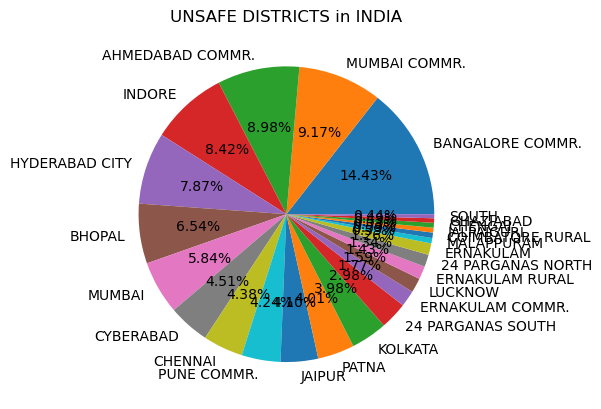

In [84]:
plt.pie(x='TOTAL IPC CRIMES' , labels = 'DISTRICT', data=dt, autopct='%0.2f%%')
plt.title('UNSAFE DISTRICTS in INDIA')
plt.show()

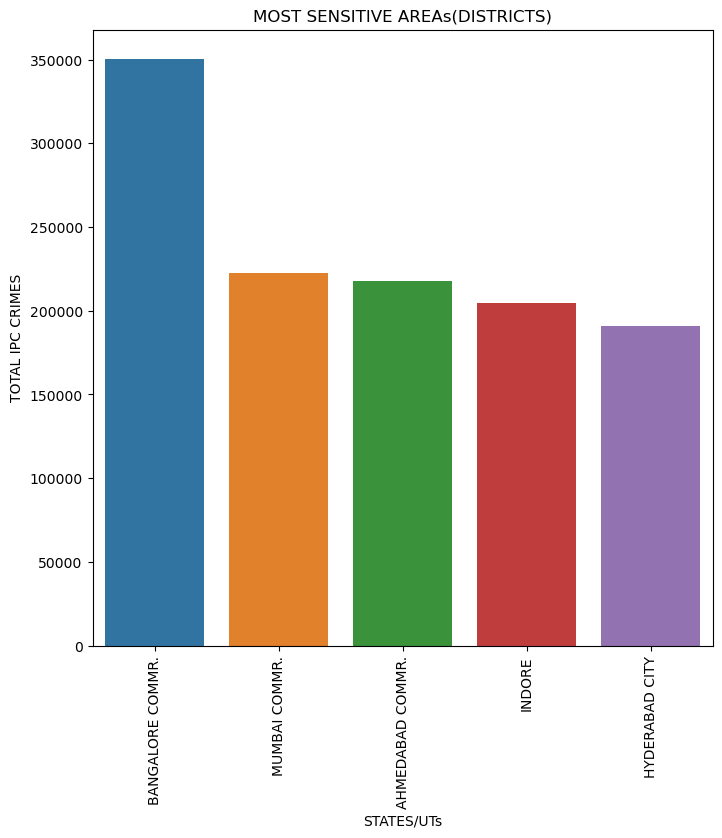

In [120]:
plt.figure(figsize=(8,8))
sns.barplot(x=dt.head(5)['DISTRICT'],y=dt.head(5)['TOTAL IPC CRIMES'])
plt.xticks(rotation=90)
plt.xlabel("STATES/UTs")
plt.title("MOST SENSITIVE AREAs(DISTRICTS)")
plt.show()

The top 5 unsafe districts are BANGALORE COMMR. , MUMBAI COMMR. , AHMEDABAD COMMR. , INDORE and  HYDERABAD CITY.

In [85]:
peaceful_areas

,STATE/UT,DISTRICT,YEAR,KIDNAPPING AND ABDUCTION OF OTHERS,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes Against Women,Total Crimes Against Children,Murder cases,Robbery & Theft,Cheating cases,cluster
3,ANDHRA PRADESH,CUDDAPAH,2001,5,164,23,795,233,1181,3140,278,0,134,449,51,1
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,0,1,0,1,4,104,287,1,0,4,331,3,1
13,ANDHRA PRADESH,MEDAK,2001,6,100,37,1367,335,454,3532,398,34,169,844,108,1
16,ANDHRA PRADESH,NIZAMABAD,2001,17,51,30,1383,220,787,3621,359,54,169,655,184,1
17,ANDHRA PRADESH,PRAKASHAM,2001,19,138,43,1266,263,808,3678,395,3,187,732,105,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8586,DELHI UT,NEW DELHI,2012,15,12,1,16,67,302,1057,160,9,16,782,162,1
8587,DELHI UT,NORTH,2012,69,5,3,92,13,927,2700,160,9,44,2192,167,1
8594,DELHI UT,STF,2012,0,0,0,0,0,1,6,160,9,1,0,4,1
8596,LAKSHADWEEP,LAKSHADWEEP,2012,0,10,3,3,0,32,60,2,0,0,17,0,1


In [121]:
dt = peaceful_areas.groupby('DISTRICT')['TOTAL IPC CRIMES'].sum().sort_values(ascending=True).reset_index()
dt

,DISTRICT,TOTAL IPC CRIMES
0,RAILWAYS KATRA,2
1,RAILWAYS KMR,10
2,BIEO,16
3,CID,23
4,CAR,24
...,...,...
654,DAMOH,34789
655,AURANGABAD RURAL,35481
656,VISAKHA RURAL,35912
657,DAVANAGERE,36167


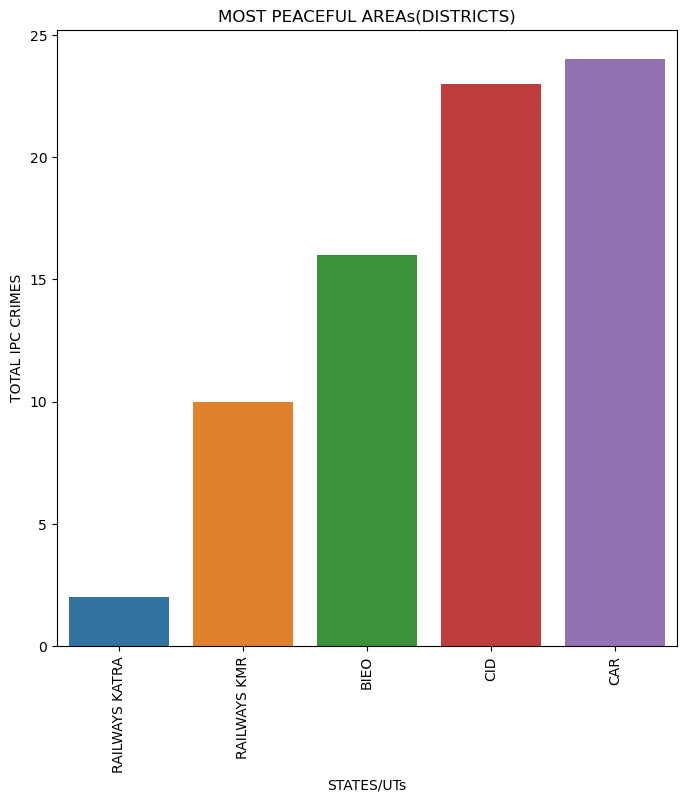

In [122]:
plt.figure(figsize=(8,8))
sns.barplot(x=dt.head(5)['DISTRICT'],y=dt.head(5)['TOTAL IPC CRIMES'])
plt.xticks(rotation=90)
plt.xlabel("STATES/UTs")
plt.title("MOST PEACEFUL AREAs(DISTRICTS)")
plt.show()

The top safe districts are RAILWAYS KATRA, RAILWAYS KMR, BIEO, CID and CAR.

In [87]:
model.cluster_centers_

array([[1.86122361e+01, 1.66921586e+02, 2.54756570e+01, 8.23293408e+02,
        2.32383886e+02, 2.35639638e+03, 5.51199354e+03, 4.52697113e+02,
        4.74976303e+01, 1.46212408e+02, 1.82248169e+03, 2.12807841e+02],
       [6.81782694e+00, 5.52934288e+01, 8.43542615e+00, 1.95780904e+02,
        6.58301887e+01, 5.48718933e+02, 1.41814720e+03, 1.35368412e+02,
        1.51128822e+01, 6.86019844e+01, 4.65853936e+02, 5.53231945e+01],
       [6.02769231e+01, 3.65953846e+02, 2.08769231e+01, 1.97962308e+03,
        4.44438462e+02, 7.38556923e+03, 1.86815769e+04, 1.10665385e+03,
        1.47807692e+02, 2.92400000e+02, 1.04923615e+04, 1.10986923e+03]])

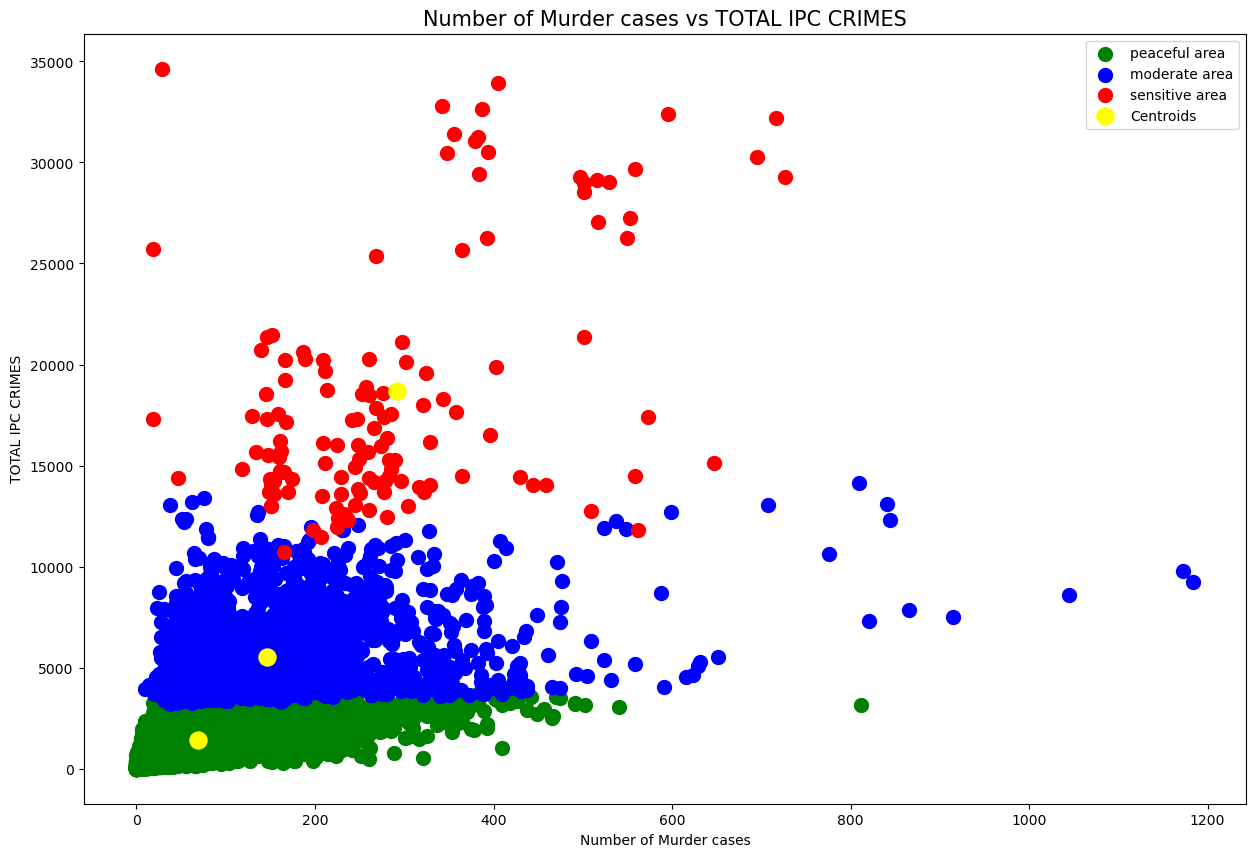

In [88]:
plt.figure(figsize=(15,10))
plt.scatter( peaceful_areas['Murder cases'] , peaceful_areas['TOTAL IPC CRIMES'] ,s=100 , c='green' , label='peaceful area')
plt.scatter( moderate_areas['Murder cases'] , moderate_areas['TOTAL IPC CRIMES'] ,s=100 , c='blue' , label='moderate area')
plt.scatter( sensitive_areas['Murder cases'] , sensitive_areas['TOTAL IPC CRIMES'] ,s=100 , c='red' , label='sensitive area')
plt.scatter( model.cluster_centers_[:,9]  , model.cluster_centers_[:,6] , s=150 , c='yellow' , label= 'Centroids'  )
plt.title('Number of Murder cases vs TOTAL IPC CRIMES' , fontsize=15)
plt.xlabel('Number of Murder cases')
plt.ylabel('TOTAL IPC CRIMES')
plt.legend()
plt.show()

Clearly, we can see here that No. of murder cases and Total IPC crimes are less in Peaceful areas and medium to high in moderate areas and very high in Sensitive areas.

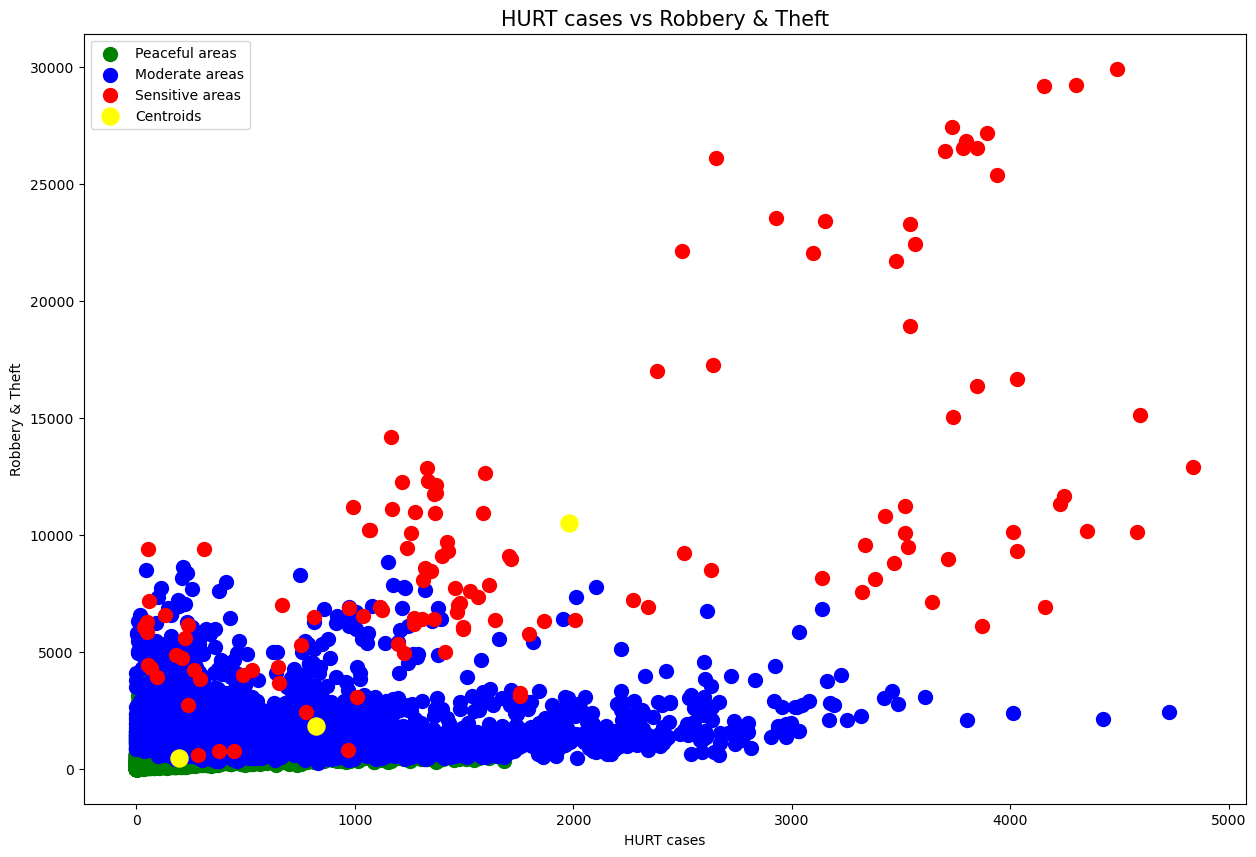

In [90]:
plt.figure(figsize=(15,10))
plt.scatter( peaceful_areas['HURT/GREVIOUS HURT'] , peaceful_areas['Robbery & Theft'] ,s=100 , c='green' , label='Peaceful areas')
plt.scatter( moderate_areas['HURT/GREVIOUS HURT'] , moderate_areas['Robbery & Theft'] ,s=100 , c='blue' , label='Moderate areas')
plt.scatter( sensitive_areas['HURT/GREVIOUS HURT'] , sensitive_areas['Robbery & Theft'] ,s=100 , c='red' , label='Sensitive areas')
plt.scatter( model.cluster_centers_[:,3]  , model.cluster_centers_[:,10] , s=150 , c='yellow' , label= 'Centroids'  )
plt.title('HURT cases vs Robbery & Theft' , fontsize=15)
plt.xlabel('HURT cases')
plt.ylabel('Robbery & Theft')
plt.legend()
plt.show()

Clearly, we can see here that No. of HURT cases and Robbery cases are less in Peaceful areas and medium to high in moderate areas and very high in Sensitive areas

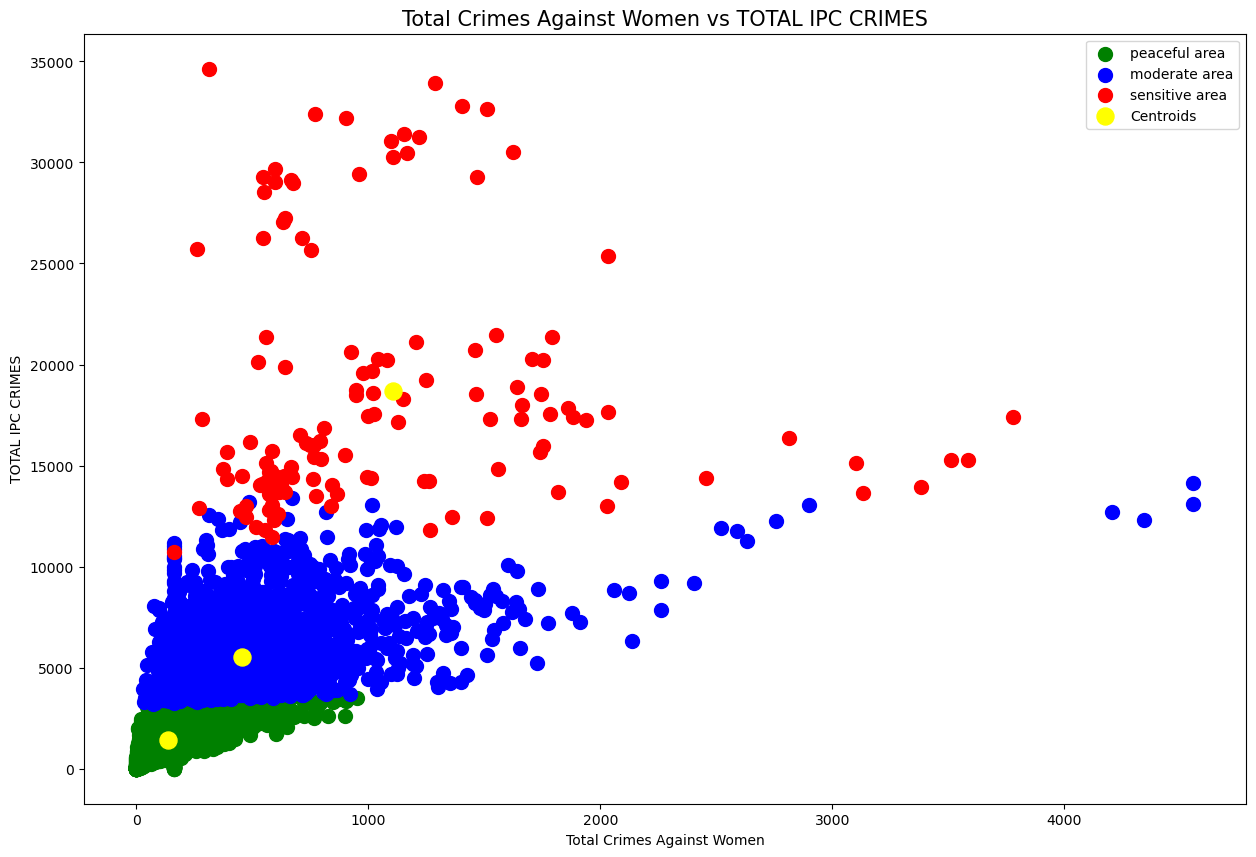

In [94]:
plt.figure(figsize=(15,10))
plt.scatter( peaceful_areas['Total Crimes Against Women'] , peaceful_areas['TOTAL IPC CRIMES'] ,s=100 , c='green' , label='peaceful area')
plt.scatter( moderate_areas['Total Crimes Against Women'] , moderate_areas['TOTAL IPC CRIMES'] ,s=100 , c='blue' , label='moderate area')
plt.scatter( sensitive_areas['Total Crimes Against Women'] , sensitive_areas['TOTAL IPC CRIMES'] ,s=100 , c='red' , label='sensitive area')
plt.scatter( model.cluster_centers_[:,7]  , model.cluster_centers_[:,6] , s=150 , c='yellow' , label= 'Centroids'  )
plt.title('Total Crimes Against Women vs TOTAL IPC CRIMES' , fontsize=15)
plt.xlabel('Total Crimes Against Women')
plt.ylabel('TOTAL IPC CRIMES')
plt.legend()
plt.show()

Clearly, we can see here that Total crimes against Women and Total IPC crimes are less in Peaceful areas and medium to high in moderate areas and very high in Sensitive areas.

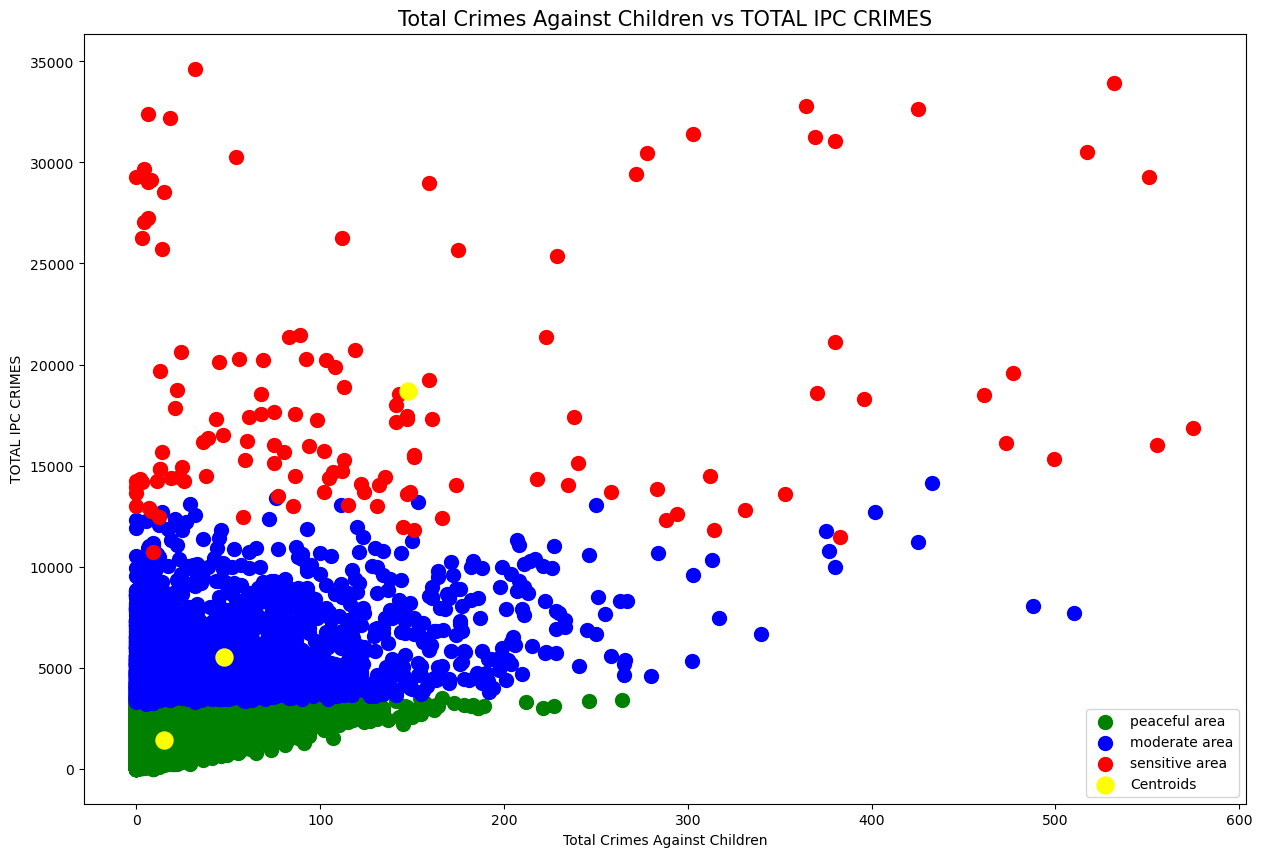

In [93]:
plt.figure(figsize=(15,10))
plt.scatter( peaceful_areas['Total Crimes Against Children'] , peaceful_areas['TOTAL IPC CRIMES'] ,s=100 , c='green' , label='peaceful area')
plt.scatter( moderate_areas['Total Crimes Against Children'] , moderate_areas['TOTAL IPC CRIMES'] ,s=100 , c='blue' , label='moderate area')
plt.scatter( sensitive_areas['Total Crimes Against Children'] , sensitive_areas['TOTAL IPC CRIMES'] ,s=100 , c='red' , label='sensitive area')
plt.scatter( model.cluster_centers_[:,8]  , model.cluster_centers_[:,6] , s=150 , c='yellow' , label= 'Centroids'  )
plt.title('Total Crimes Against Children vs TOTAL IPC CRIMES' , fontsize=15)
plt.xlabel('Total Crimes Against Children')
plt.ylabel('TOTAL IPC CRIMES')
plt.legend()
plt.show()

Here, we can see here that Total Crimes against Children are less in Peaceful areas and medium to high in moderate areas and very high in Sensitive areas.

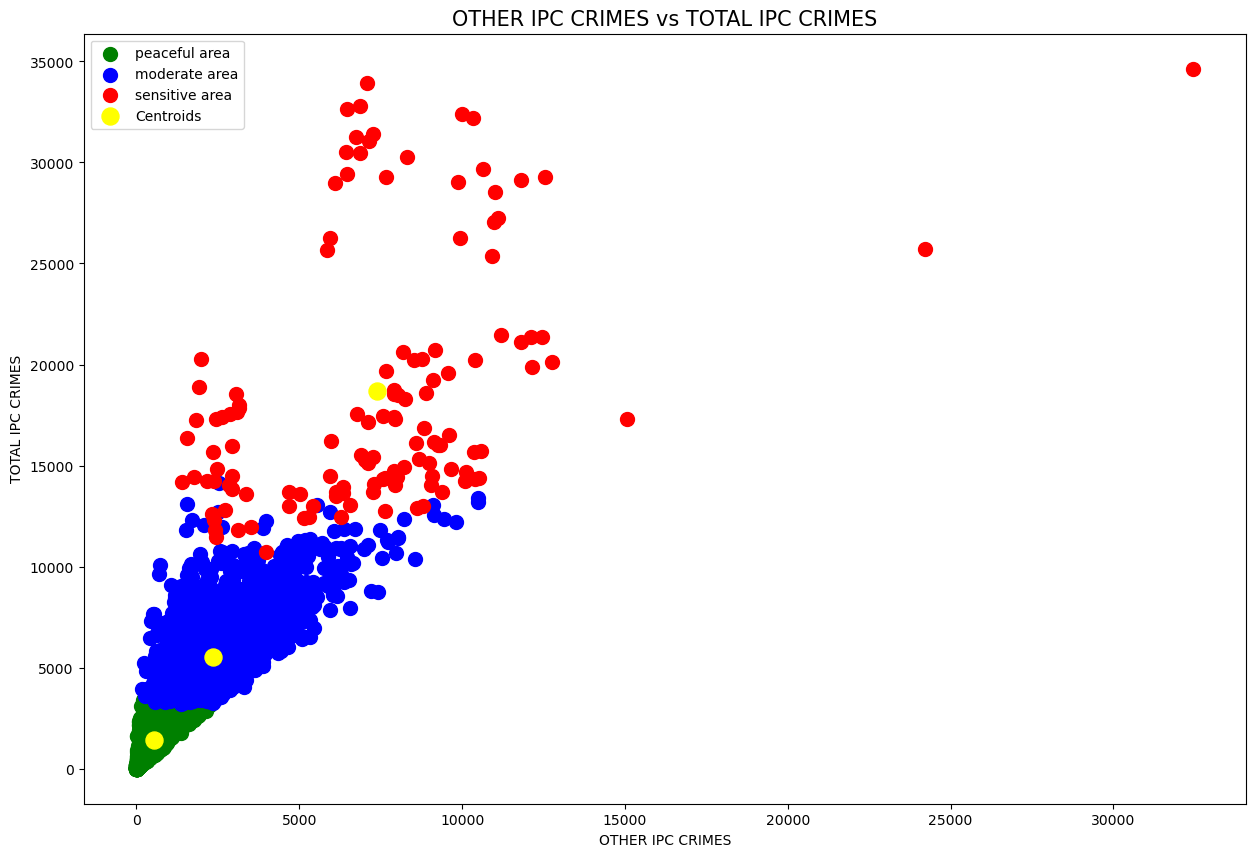

In [95]:
plt.figure(figsize=(15,10))
plt.scatter( peaceful_areas['OTHER IPC CRIMES'] , peaceful_areas['TOTAL IPC CRIMES'] ,s=100 , c='green' , label='peaceful area')
plt.scatter( moderate_areas['OTHER IPC CRIMES'] , moderate_areas['TOTAL IPC CRIMES'] ,s=100 , c='blue' , label='moderate area')
plt.scatter( sensitive_areas['OTHER IPC CRIMES'] , sensitive_areas['TOTAL IPC CRIMES'] ,s=100 , c='red' , label='sensitive area')
plt.scatter( model.cluster_centers_[:,5]  , model.cluster_centers_[:,6] , s=150 , c='yellow' , label= 'Centroids'  )
plt.title('OTHER IPC CRIMES vs TOTAL IPC CRIMES' , fontsize=15)
plt.xlabel('OTHER IPC CRIMES')
plt.ylabel('TOTAL IPC CRIMES')
plt.legend()
plt.show()

Clearly, we can see here that OTHER IPC crimes are less in Peaceful areas and medium to high in moderate areas and very high in Sensitive areas.

In [124]:
dt = sensitive_areas.groupby('DISTRICT')['Total Crimes Against Women'].sum().sort_values(ascending=False).reset_index()
dt

,DISTRICT,Total Crimes Against Women
0,HYDERABAD CITY,18694
1,24 PARGANAS SOUTH,16067
2,AHMEDABAD COMMR.,14973
3,CYBERABAD,12660
4,INDORE,10392
5,MUMBAI COMMR.,9304
6,BANGALORE COMMR.,9010
7,24 PARGANAS NORTH,6881
8,BHOPAL,6618
9,KOLKATA,6278


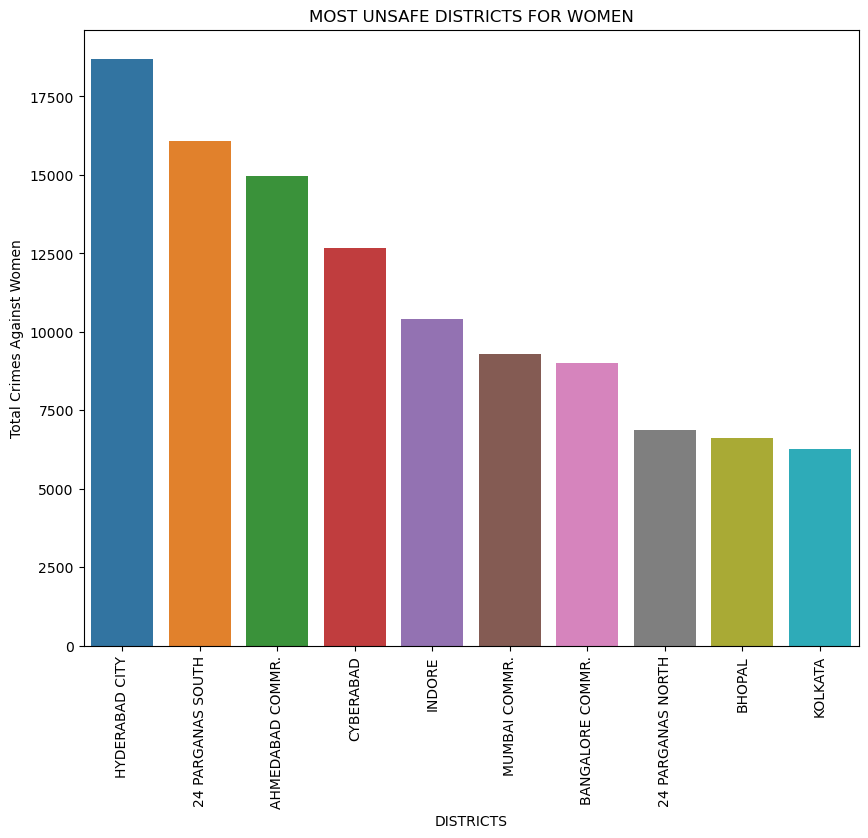

In [127]:
plt.figure(figsize=(10,8))
sns.barplot(x=dt.head(10)['DISTRICT'],y=dt.head(10)['Total Crimes Against Women'])
plt.xticks(rotation=90)
plt.xlabel("DISTRICTS")
plt.title("MOST UNSAFE DISTRICTS FOR WOMEN")
plt.show()

In [129]:
dt = peaceful_areas.groupby('DISTRICT')['Total Crimes Against Women'].sum().sort_values(ascending=True).reset_index()
dt

,DISTRICT,Total Crimes Against Women
0,BIEO,0
1,CRIME SRINAGAR,0
2,CRIME KASHMIR,0
3,RAILWAYS KATRA,0
4,CRIME JAMMU,0
...,...,...
654,DARRANG,4873
655,WEST,4950
656,SRINAGAR,5248
657,MAYURBHANJ,5356


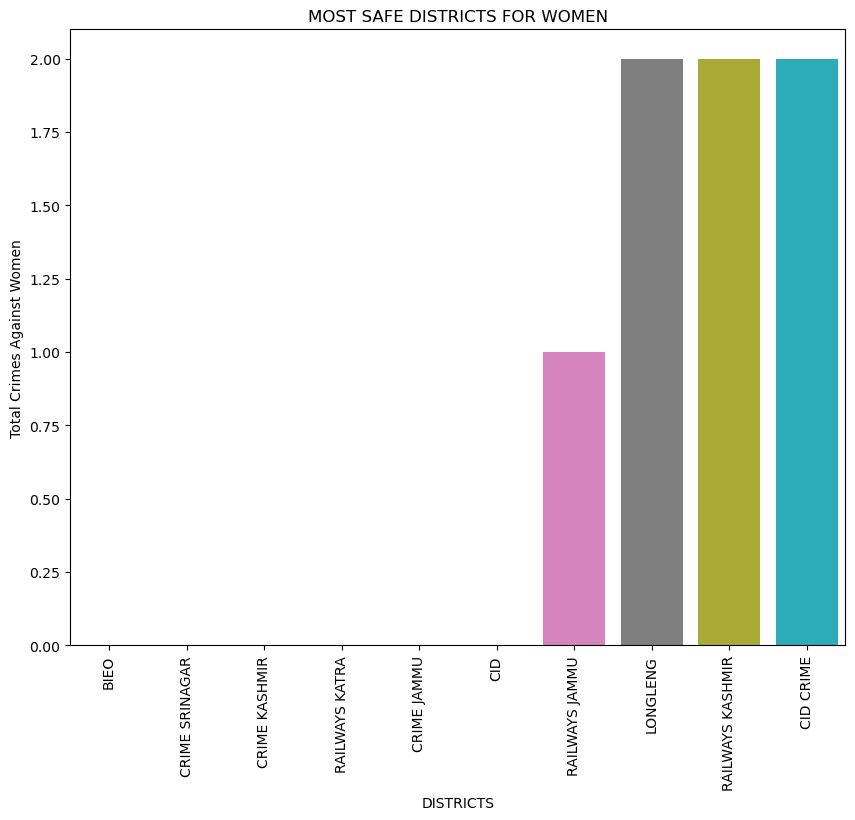

In [130]:
plt.figure(figsize=(10,8))
sns.barplot(x=dt.head(10)['DISTRICT'],y=dt.head(10)['Total Crimes Against Women'])
plt.xticks(rotation=90)
plt.xlabel("DISTRICTS")
plt.title("MOST SAFE DISTRICTS FOR WOMEN")
plt.show()

In [131]:
dt = sensitive_areas.groupby('DISTRICT')['Total Crimes Against Children'].sum().sort_values(ascending=False).reset_index()
dt

,DISTRICT,Total Crimes Against Children
0,INDORE,4401
1,MUMBAI COMMR.,2865
2,PUNE COMMR.,2558
3,AHMEDABAD COMMR.,1435
4,BHOPAL,1249
5,MUMBAI,1021
6,KOLKATA,944
7,HYDERABAD CITY,847
8,PATNA,846
9,BANGALORE COMMR.,675


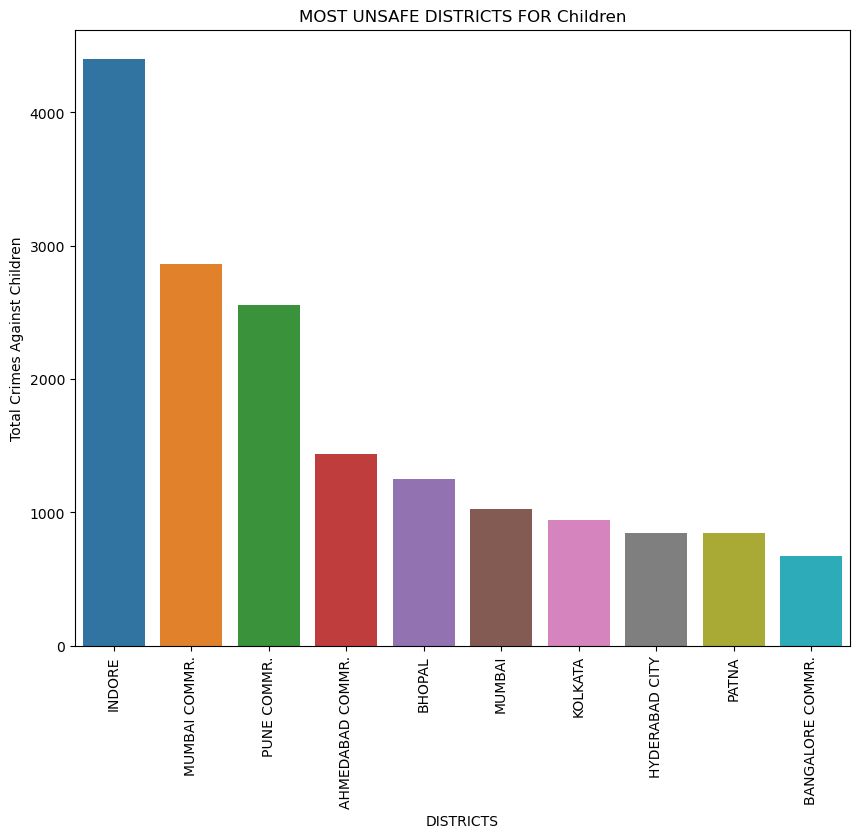

In [132]:
plt.figure(figsize=(10,8))
sns.barplot(x=dt.head(10)['DISTRICT'],y=dt.head(10)['Total Crimes Against Children'])
plt.xticks(rotation=90)
plt.xlabel("DISTRICTS")
plt.title("MOST UNSAFE DISTRICTS FOR Children")
plt.show()

In [133]:
dt = peaceful_areas.groupby('DISTRICT')['Total Crimes Against Children'].sum().sort_values(ascending=True).reset_index()
dt

,DISTRICT,Total Crimes Against Children
0,HOWRAH CITY,0
1,MANDYA,0
2,AWANTIPORA,0
3,HAMREN,0
4,SHOPIAN,0
...,...,...
654,SITAPUR,998
655,BALAGHAT,1089
656,NARSINGHPUR,1099
657,TIKAMGARH,1158


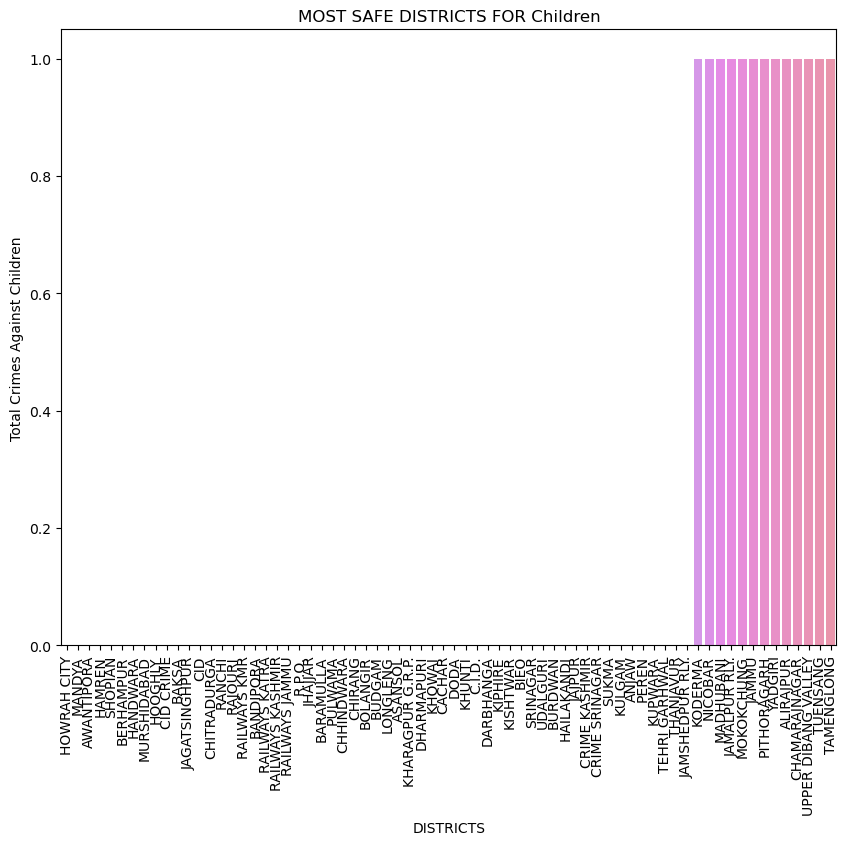

In [140]:
plt.figure(figsize=(10,8))
sns.barplot(x=dt.head(70)['DISTRICT'],y=dt.head(70)['Total Crimes Against Children'])
plt.xticks(rotation=90)
plt.xlabel("DISTRICTS")
plt.title("MOST SAFE DISTRICTS FOR Children")
plt.show()

Nearly 60 districts have 0 CRIMES agrainst CHILDREN.

# 4.4 Capstone project overall story in your own words. Min 1000 words.

  In our capstone project, we are provided with different datasets regarding CRIMES in INDIA across states and districts. We have analysed the crime datasets across four phases.In our overall project we analysed various crimes that have occured in the states/UTs over the years 2001-2012.

With our analysis, we can see that Crimes are increasing year by year that is not a good thing for our country.
In Phase 1 we have collected datas like literacy rate, Population and Area of all states/UTs for all years from 2001 to 2012.
From this, we can see that literacy rate of each states has been increased over the years. Kerala is the top litearte state in INDIA and Bihar is the lowest literate state in INDIA. Except Nagaland, all states have increased in the population over the years. Uttarpradesh is the most populated state in our Country and Lakshadweep is the least populated UT in our country. We fetched datas from Census of INDIA 2001 and 2011.


In Phase 2, we have analysed Crimes of each state with literacy rate, population and area. Madhya Pradesh has the highest no. of total IPC crimes.
Lakshadweep has the lowest no. of total IPC crimes.The states Maharashtra, Andhrapradesh, Uttarpradesh, Tamilnadu, Rajasthan, kerala, karanataka, Bihar, Gujarat and West Bengal are having high no. of total IPC crimes.In most cases the crimes are very high in low literacy states.The state MADHYA PRADESH with literacy rate of 70.63 % has the highest number of total IPC crimes.
Despite having the highest literacy rate of 93.91%, KERALA has also have high crime rate, as we can understand its due to others factors also.High literacy is not a prevention against criminality as it also includes other factors like Poverty, Drugs, Politics, Religion, Society, Unemployment, Unequal rights, Unfair justice system etc.

In our analysis, we can see that Crime against Women such as Rape, Kiddnapings and Importation of Girls, etc are increasing year by year.Out of all Crimes registered, crimes  like 'THEFT' and 'HURT/GREVIOUS HURT' are registered in large amount of numbers.
From PHASE 2 these are our observations:


From PHASE 2 these are our observations:


* 'UTTAR PRADESH' has highest no. of cases in 'Murder'.
* 'MADHYA PRADESH' has highest no. of Rapes registered.
* 'ASSAM' state is the highest in 'CUSTODIAL RAPE' and 'JHARKHAND' is the second.
* UTTAR PRADESH is first in kidnapping of Women and girls.
* National Capital DELHI is second in kidnapping of Women and girls, first in kidnapping of Others and first in AUto Theft.
* 'BIHAR' has the highest no.of cases in 'DACOITY', second is 'MAHARASHTRA'.
* 'ROBBERY' cases are high in 'MAHARASHTRA', next is 'UTTAR PRADESH'.
* In 'BURGLARY' and 'THEFT' cases, state 'MAHARASHTRA' is the first.
* 'RIOTS' are maximum in 'BIHAR' and 'KERALA'.
* 'CHEATING' cases are high in 'RAJASTHAN'.
* In 'COUNTERFIETING', 'MAHARASHTRA' is the first and 'UTTAR PRADESH' is the second.
* 'MAHARASHTRA' has the highest no. of 'ARSON' cases, second is state 'ANDHRA PRADESH'.
* Highest no. of 'HURT/GREVIOUS HURT' caes registered in 'ANDHRA PRADESH'.
* Nearly 25% of 'DOWRY DEATHS' registered in 'UTTAR PRADESH', second is 'BIHAR'(14%).
* 'WEST BENGAL' has the highest no. of 'CRUELTY BY HUSBAND OR HIS RELATIVES' cases.
* Nearly 50% of 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES' cases registered in 'BIHAR'.
* 'TAMIL NADU' has the highest no.of cases in 'CAUSING DEATH BY NEGLIGENCE', second is 'ANDHRA PRADESH'.
* 'MADHYA PRADESH' and 'TAMIL NADU' has the highest no.of cases in 'OTHER IPC CRIMES'.

Apart from these, Crimes against Children are also high in Madhya Pradesh, Uttarpradesh and Maharastra. Crimes against women are high in 
ANDHRA PRADESH, UTTAR PRADESH, WEST BENGAL, MADHYA PRADESH, RAJASTHAN, MAHARASHTRA states. These states are not safe for women and Children to live. Muder crimes are highest in year 2001  and 2002.'RAPE' crime rate has been increasing steadily from 2003 and highest no. of rapes in 2012, it makes INDIA is non safe for women. In 2005 and 2010 has the highest crime rate in 'CUSTODIAL RAPE'.From 2003 to 2012 crime rate of all 'KIDNAPPINGS' crime rate has been increased steadily.From 2001 to 2012 crime rate of 'DACOITY' has been steadily decreased. Crime rate of 'ROBBERY' has been increased steadily from 2005 ,highest in 2012 and lowest in 2003. CHEATING and AUTO THEFT has been steadily increased from 2001 to 2012.COUNTERFEITING crimes are highest in 2008.From 2005 to 2011 crime rate of 'DOWRY DEATHS' has been steadily increased.Crime rate 'CRUELTY BY HUSBAND OR HIS RELATIVES' has been incresed steadily year by year i.e 2001 to 2012. Crime rate of 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES' highest in 2005  lowest in 2010. 2003 to 2011 crime rate of 'CAUSING DEATH BY NEGLIGENCE' has been steadily increased. 'OTHER IPC CRIMES' has been increased steadily from 2003 to 2012.

We have compared Area and Population with crimes also, Crime are high in large areas, but in small area also crimes are high, For ex. DELHI with area 1428 sq.km has high crime rate because of population density. So, Area is not a great factor in comparing the crime rates.UTTAR PRADESH' is the highest populated state, its not the first in total IPC crimes, but it is one of the top 5 Crime states.
We can say that crime is high when the population is also high but it also depends upon other factors.
Population is one of the important factors influencing the incidence of crime.
Many socio-economic factors, besides population, could influence the crimes in particular place.
Factors such as Poverty, Peer Pressure, Drugs, Politics, Religion, Society, Unemployment, Unequal rights,Unfair justice system etc, also influences the crimes in particular state.

Juvenile crime are also increasing year by year. Major cause of juvenile crimes are usage of drugs and bad parenting.
Prevalence of drugs are increased now, we have seen drugs busts in news articles everyday. Government should take necessary steps to stop these drugs.

In phase 3, we have done SQL operations. In phase 4 we have done the Unsupervised learning by combining the datasets.
From this, we created 3 clusters like sensitive, moderate and peaceful disticts based on crimes.
From this, we observed that  top 5 unsafe districts are BANGALORE COMMR. , MUMBAI COMMR. , AHMEDABAD COMMR. , INDORE and HYDERABAD CITY.
The top safe districts are RAILWAYS KATRA, RAILWAYS KMR, BIEO, CID and CAR.


Overall the causes of these crimes are many Socio economic factors are Poverty, Drugs, Politics, Religion, Society, Unemployment, Unequal rights, Unfair justice system etc.
Poverty is one of the main reasons for crime, it leads to many crimes such as theft, robbery, dacoity even sometimes leads to murder.In India day by day there is increase in divide between rich and poor.Crime and drug abuse are closely related. A person under the influence tends to indulge in criminal activities.
Caste and Religion also causes crimes even today, being INDIA is a secular country many crimes are happening in our country.
Lack of Education & Gender Inequality leads to many crimes like rape and other crimes against Women

To solve these issues, Government should take necessary steps to eradicate the poverty and decrease the divide between rich and poor, creating employement opportunities, providing free and affordable education to everyone, strict action against drugs, creating awareness among the people and oraganising many social welfare camps. So, crimes are not based on one factor its interlinked with many factors.

So, this was my overall crime report and it concludes the final phase of Capstone project. THANK YOU!!!

# THANK YOU!!!